In [107]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)

<hr />

In [108]:
from util import cassy;

table = cassy.read("./data/good_data_maybe", with_header=True);
header = table[0]
table = table[1:]
print(header)

['Zeit t / s', 'Strom I_A1 / A', 'Magn. Flussdichte B_B1 / mT', 'Frequenz f / Hz']


In [109]:
from util.structs import DataCluster, Dataset, Measurement;

data = DataCluster();

for row in table:
    data.add(Dataset({
        "I [A]": Measurement(row[1], abs(0.01 * row[1])),
        "B [T]": Measurement(row[2], abs(0.01 * row[2])) * 1e-3,
    }))

df = data.get_markdownTable();
df.T

,0,1,2,3,4,5,6,7,8,9,...,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159
B [T],-0.0100,-0.010000,-0.0100,-0.0100,-0.010000,-0.0100,-0.0100,-0.0100,-0.0100,-0.0100,...,-0.583000,-0.575500,-0.569500,-0.565500,-0.561000,-0.557500,-0.554500,-0.55100,-0.547000,-0.543500
ΔB [T],0.0001,0.000100,0.0001,0.0001,0.000100,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.005830,0.005755,0.005695,0.005655,0.005610,0.005575,0.005545,0.00551,0.005470,0.005435
I [A],0.0000,0.001500,0.0000,0.0000,0.001500,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.195500,1.164000,1.152000,1.143000,1.129500,1.120500,1.114500,1.10400,1.090500,1.084500
ΔI [A],0.0000,0.000015,0.0000,0.0000,0.000015,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.011955,0.011640,0.011520,0.011430,0.011295,0.011205,0.011145,0.01104,0.010905,0.010845


In [110]:
# wikipedia
mu_0 = Measurement(
    1.25663706127, 
    0.00000000020
) * 1e-6;
N = 500 * 2; # wird fehlerfrei angenommen
# aus Versuchsanleitung
lFe = Measurement(477, 4) * 1e-3;
d_L = Measurement(2.00, 0.05) * 1e-3;

def calc_H(I, BFe):
    a = (N * I) / lFe
    b = d_L / (mu_0 * lFe)  * BFe
    return a - b;

In [111]:

for d in data:
    d["H_Fe"] = calc_H(d["I [A]"], d["B [T]"]);

data.round_index("H_Fe");

data.save_to_excel("./output/data");

In [112]:
# split data

seperation_index = 545
end_index = -150
neukurve = DataCluster(data[:seperation_index])
hysteresekurve = DataCluster(data[seperation_index:end_index])
rest = DataCluster(data[end_index:])

In [113]:
# plot data spiegeln

for d in data:
    d["B [T]"] = -1 * d["B [T]"]


Bad key scatter.edgecolor in file ../../../util/pyplot/scatter_plot.mplstyle, line 25 ('scatter.edgecolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key scatter.sizes in file ../../../util/pyplot/scatter_plot.mplstyle, line 26 ('scatter.sizes: 50')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


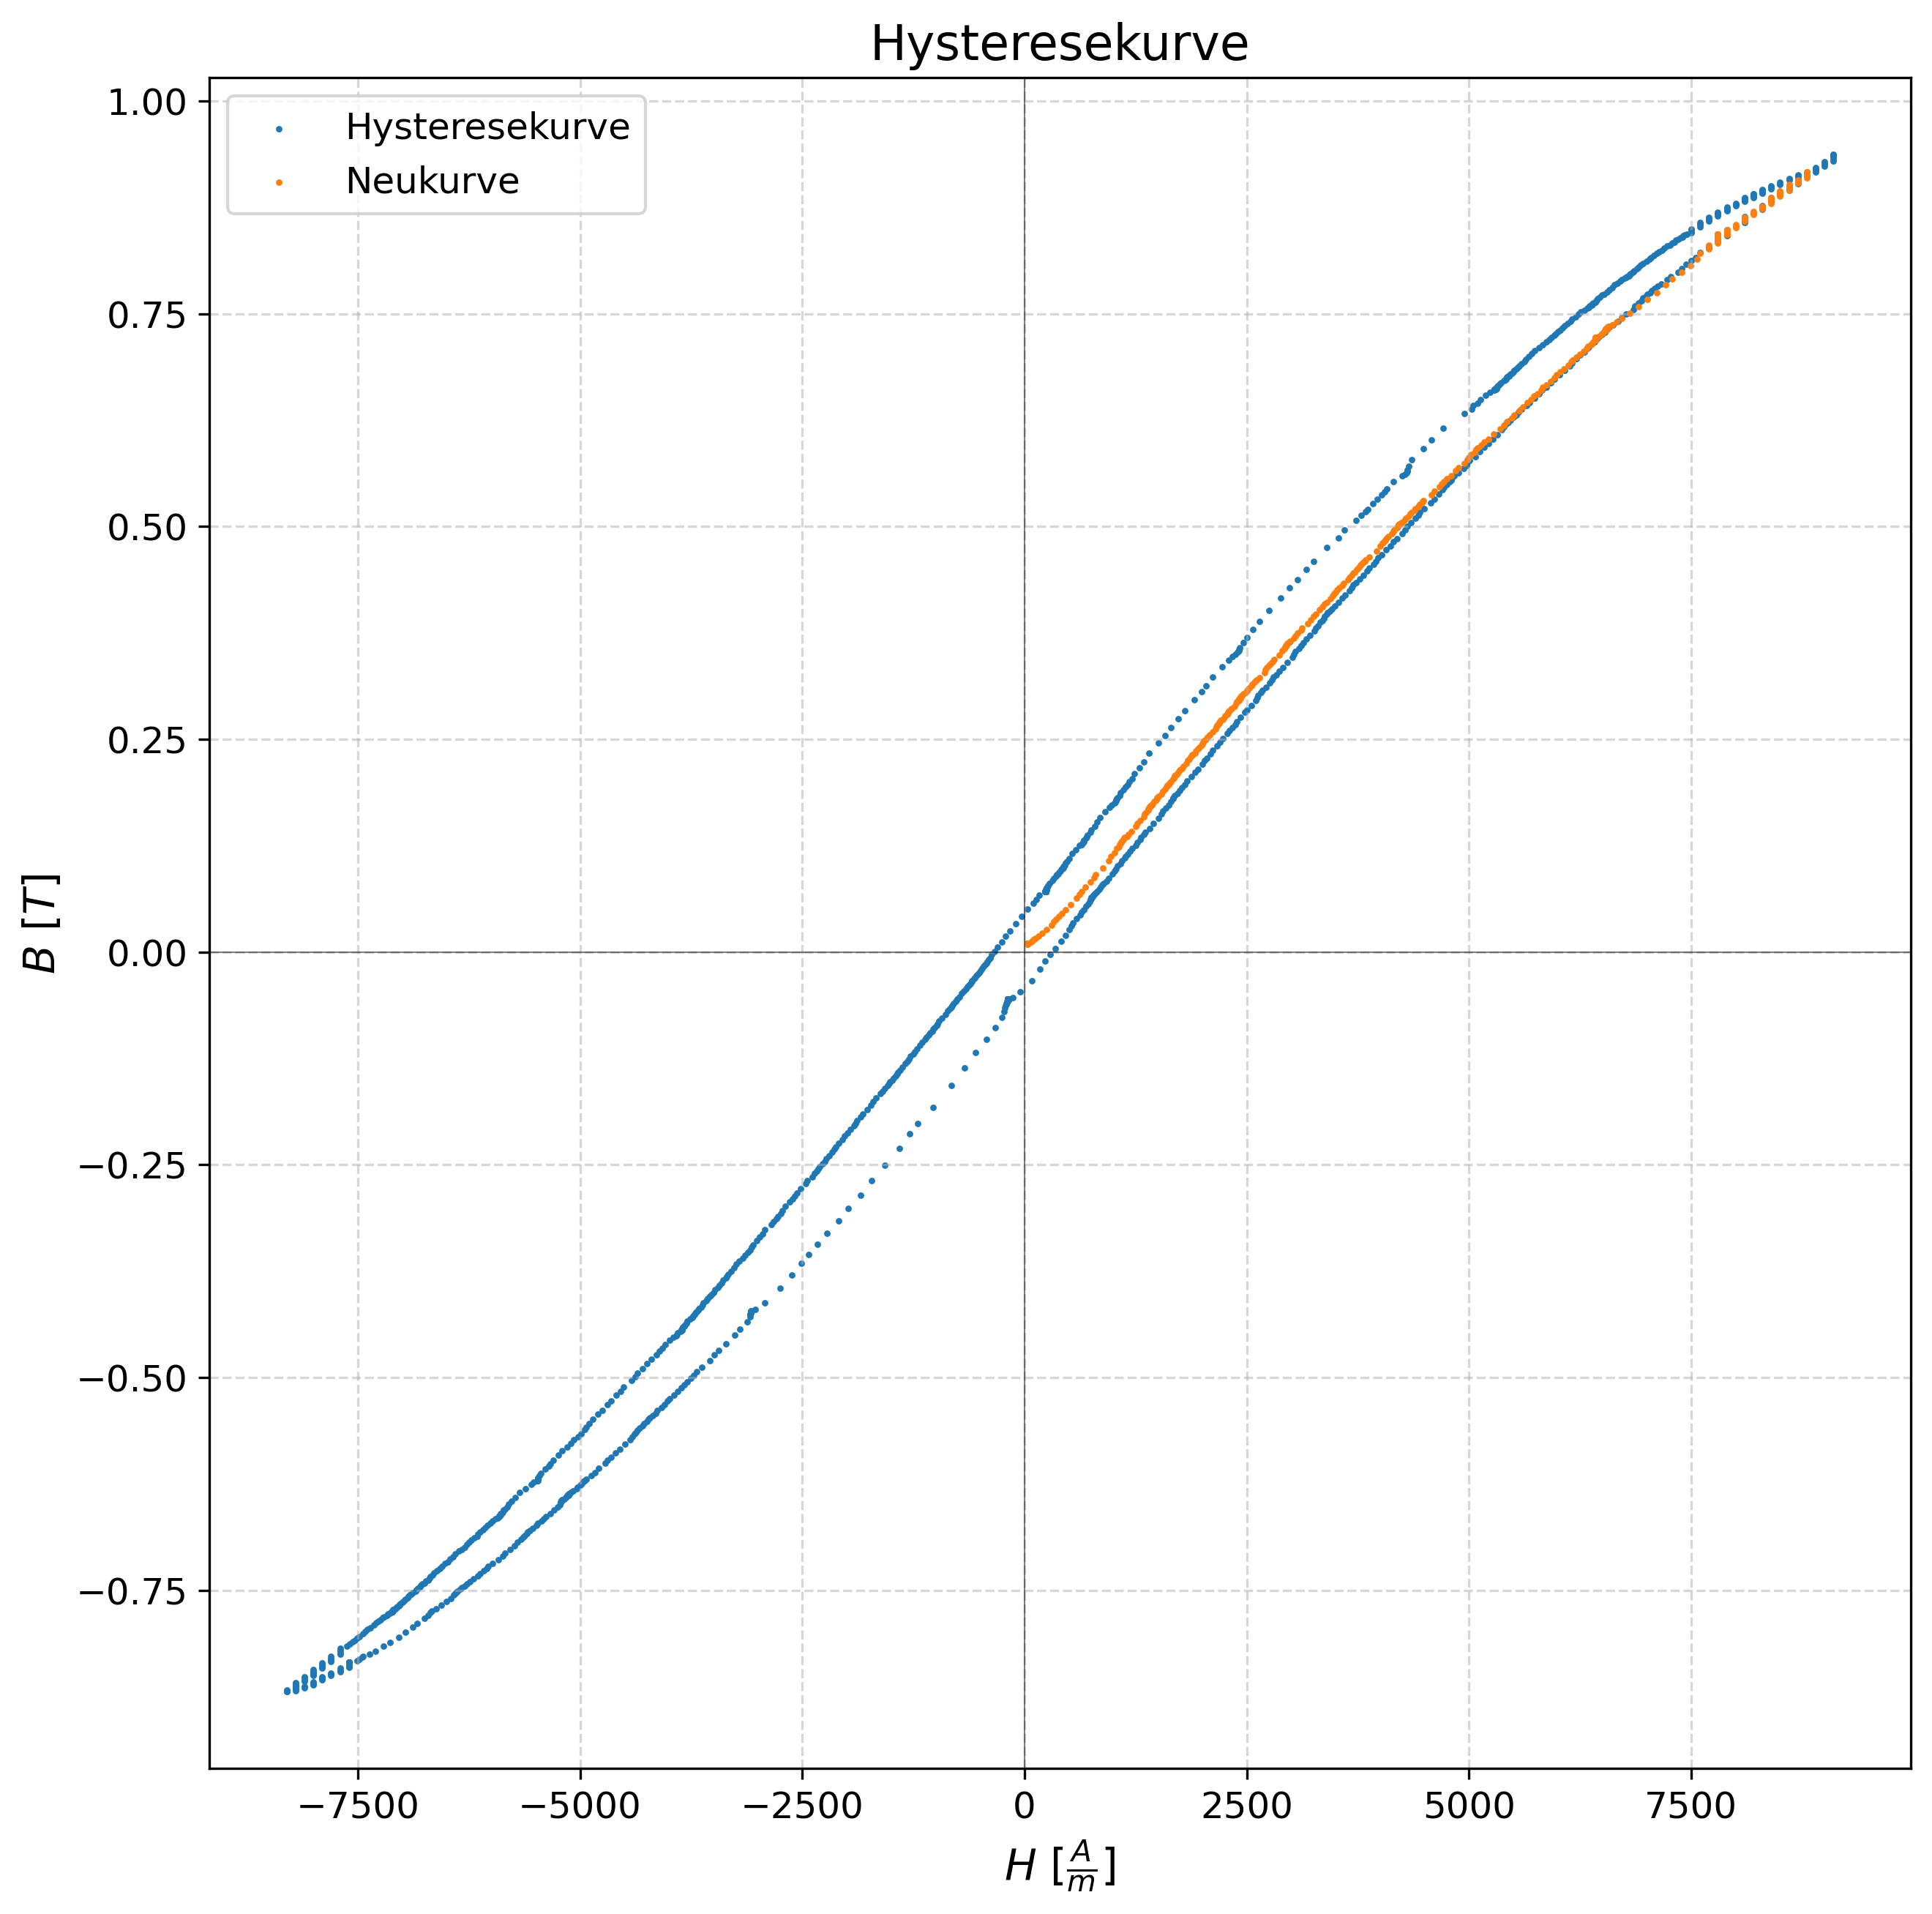

In [114]:
from util import graph
import matplotlib.pyplot as plt;

plt.style.use("../../../util/pyplot/scatter_plot.mplstyle");

plot = plt.subplots(figsize=(10, 10));
fig, ax = plot;

ax.set_title(r"Hysteresekurve")
ax.axvline(0, linestyle="-", color="black", alpha=.5)
ax.axhline(0, linestyle="-", color="black", alpha=.5)
ax.set_xlabel(r"$H~[\frac{A}{m}]$")
ax.set_ylabel(r"$B~[T]$")

graph.scatter_data(hysteresekurve, "H_Fe", "B [T]", with_error=False, p=plot, marker=".", s=5, label=r"Hysteresekurve")
graph.scatter_data(neukurve, "H_Fe", "B [T]", with_error=False, p=plot, marker=".", s=5, label="Neukurve")

ax.legend();

fig.savefig("./output/Hysteresekurve.pdf")
fig.savefig("./output/Hysteresekurve")

In [115]:
start = data[0]
first = data[120]
tangent_point = data[240];

print(start)
print(first)
print(tangent_point)
# print(DataCluster(data[119:125]))

graph_start_data = DataCluster([start, first])
# print(graph_start_data)
graph_tangent_data = DataCluster([start, tangent_point])

I [A]: (  0.000 ±   0.000) [⋅], B [T]: (100.000 ±   1.000)e-4 [⋅], H_Fe: ( 33.400 ±   1.000) [⋅]
I [A]: (165.000 ±   1.650)e-4 [⋅], B [T]: (115.000 ±   1.150)e-4 [⋅], H_Fe: ( 73.000 ±   2.000) [⋅]
I [A]: (684.000 ±   6.840)e-3 [⋅], B [T]: (300.000 ±   3.000)e-3 [⋅], H_Fe: (243.000 ±   4.000)e+1 [⋅]



Bad key scatter.edgecolor in file ../../../util/pyplot/scatter_plot.mplstyle, line 25 ('scatter.edgecolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key scatter.sizes in file ../../../util/pyplot/scatter_plot.mplstyle, line 26 ('scatter.sizes: 50')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


{'label': '$\\mu_A \\cdot H$', 'color': 'green', 'fmt': '.'}
{'label': '$\\mu_{max} \\cdot H$', 'color': 'orange', 'fmt': '.'}


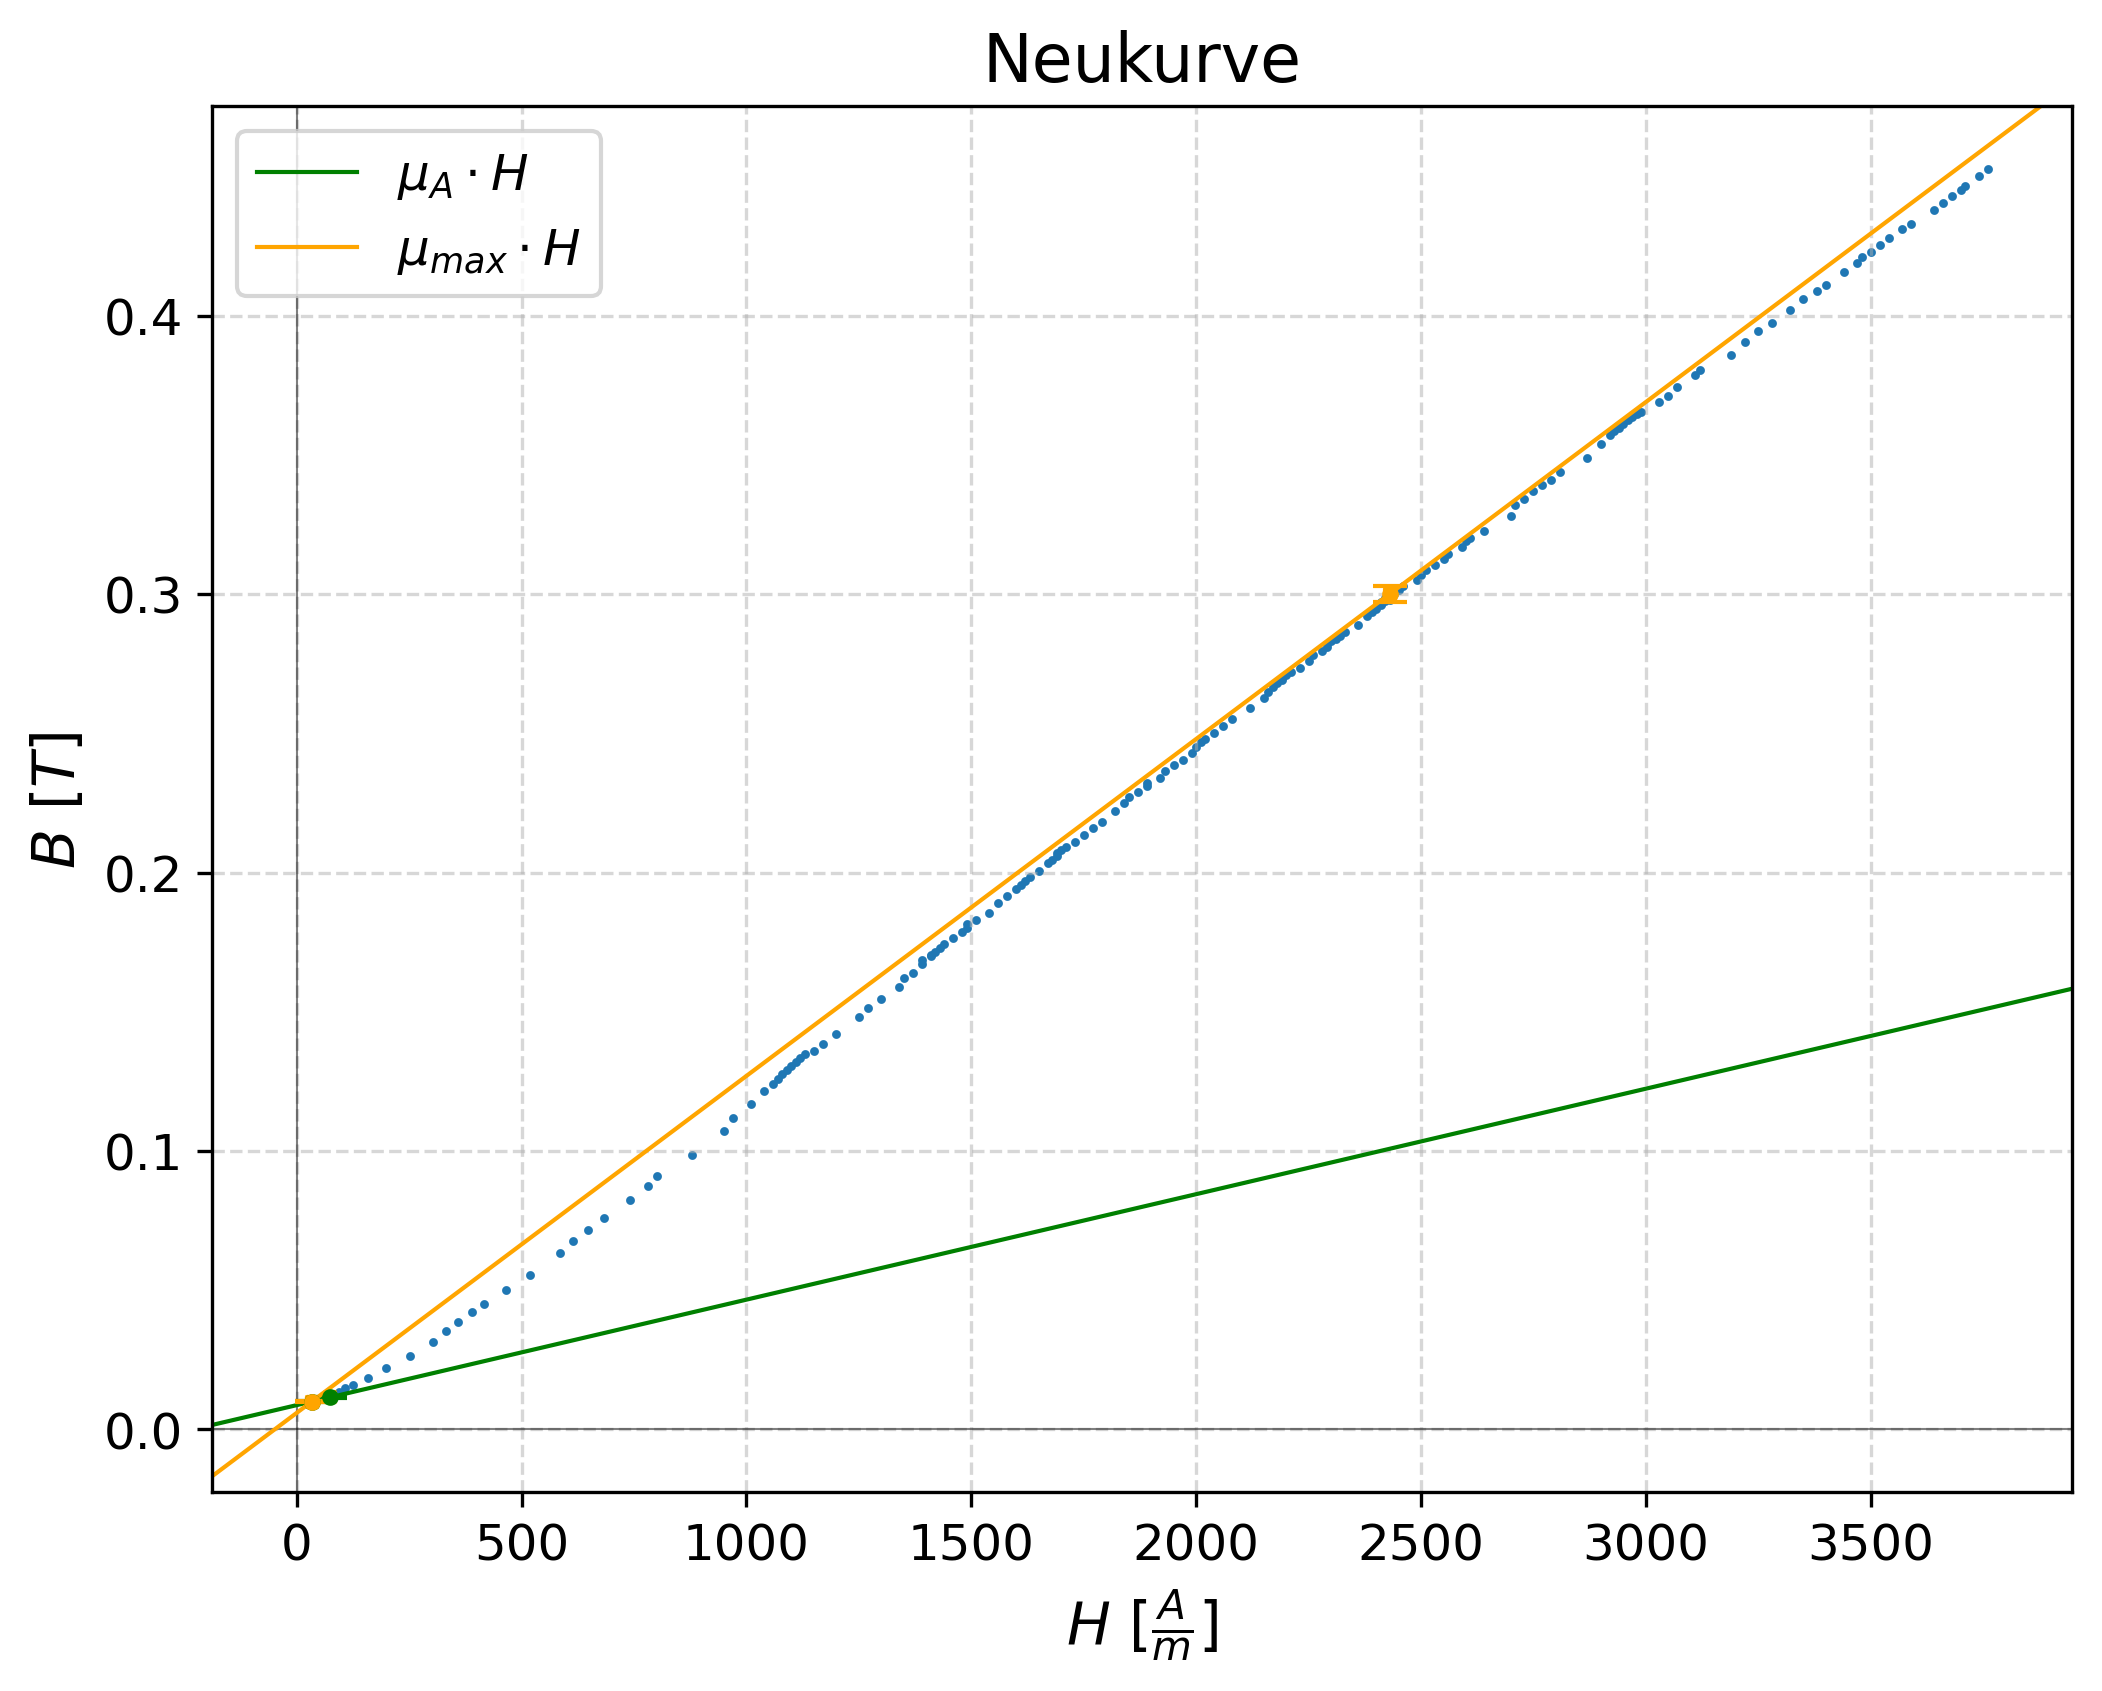

In [116]:
from util.graph_fit import GraphFit;

plt.style.use("../../../util/pyplot/scatter_plot.mplstyle");

plot = plt.subplots();
fig, ax = plot;

ax.set_title(r"Neukurve")
ax.axvline(0, linestyle="-", color="black", alpha=.5)
ax.axhline(0, linestyle="-", color="black", alpha=.5)
ax.set_xlabel(r"$H~[\frac{A}{m}]$")
ax.set_ylabel(r"$B~[T]$")

plt.rcParams['lines.linewidth'] = 0.00005 
plotted_neukurve = DataCluster(neukurve[:300])
graph.scatter_data(plotted_neukurve, "H_Fe", "B [T]", with_error=False, p=plot, marker=".", s=5)
# graph.scatter_data(plotted_neukurve, "H_Fe", "B [T]", with_error=True, p=plot, marker=".", s=5)
graph.scatter_data(graph_start_data, "H_Fe", "B [T]", with_error=False, p=plot, marker="s", s=5, color="orange")
graph.scatter_data(graph_tangent_data, "H_Fe", "B [T]", with_error=False, p=plot, marker="s", s=5, color="orange")

plt.rcParams['lines.linestyle'] = 'solid'
plt.rcParams['lines.linewidth'] = 1

func1, params1 = GraphFit.Linear.on_data(graph_start_data, "H_Fe", "B [T]", plot=plot, label=r"$\mu_A \cdot H$", color="green", fmt=".")
func2, params2 = GraphFit.Linear.on_data(graph_tangent_data, "H_Fe", "B [T]", plot=plot, label=r"$\mu_{max} \cdot H$", color="orange", fmt=".")

ax.legend(loc="upper left");

fig.savefig("./output/Neukurve.pdf")
fig.savefig("./output/Neukurve")

In [117]:
mu_A = params1["m"].round();
mu_max = params2["m"].round();
print(mu_A, params1["n"].round())
print(mu_max, params2["n"].round())

( 38.000 ±   4.000)e-6 [⋅] ( 87.000 ±   3.000)e-4 [⋅]
(121.000 ±   2.000)e-6 [⋅] ( 60.000 ±   2.000)e-4 [⋅]


In [118]:
deviation_mu_A = mu_A / mu_0
deviation_mu_max = mu_max / mu_0
print(deviation_mu_A.round())
print(deviation_mu_max.round())

( 30.000 ±   4.000) [⋅]
( 96.000 ±   2.000) [⋅]
